# The Movie Database API Exploration

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
import datetime
import missingno as msno
import warnings

from config import API_Key

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 12
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# start page
PAGE = 1

url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=utf-8 -- Encoding: utf-8


In [4]:
# query first 500 pages
popular_movies = []

for PAGE in range(1, 501):
  url = url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'
  r = requests.get(url)
  popular_movies.append(r.json())

# Movies Without Release Date

In [5]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [6]:
data = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df = pd.DataFrame(data=data)
df.head()

,page_number,adult,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,1,False,338953,en,4188.230,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.9,1841
1,2,False,836225,en,1265.345,/hangTmbxpSV4gpHG7MgSlCWSSFa.jpg,The Exorcism of God,6.8,244
2,3,False,897424,en,903.489,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,Dark Cloud,6.4,23
3,4,False,135397,en,615.480,/A0LZHXUzo5C60Oahvt7VxvwuzHw.jpg,Jurassic World,6.7,18124
4,5,False,776305,ja,482.288,/e143CxHsD7oVxqrxk29I5SJrjrl.jpg,Belle,8.0,340


In [7]:
# drop page number and adult columns
df.drop(columns=['page_number', 'adult'], inplace=True)
df

,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,338953,en,4188.230,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.9,1841
1,836225,en,1265.345,/hangTmbxpSV4gpHG7MgSlCWSSFa.jpg,The Exorcism of God,6.8,244
2,897424,en,903.489,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,Dark Cloud,6.4,23
3,135397,en,615.480,/A0LZHXUzo5C60Oahvt7VxvwuzHw.jpg,Jurassic World,6.7,18124
4,776305,ja,482.288,/e143CxHsD7oVxqrxk29I5SJrjrl.jpg,Belle,8.0,340
...,...,...,...,...,...,...,...
495,1682,ja,10.120,/avxUDXXfMQa5AIXpRpDXsyBh7UZ.jpg,Mothra vs. Godzilla,7.1,200
496,432301,en,8.877,/kkTD7ufZd7AqAnZP5IMnrQXKRpM.jpg,Chappaquiddick,6.1,216
497,482,en,12.364,/z1BKZmF9kj1NzGhKLCax48cjVl4.jpg,Shaft,6.5,255
498,20223,es,11.614,/tByXRAUHOx0poyQTGTW2vodZdPU.jpg,Bad Girls,6.9,105


In [8]:
df.shape

(500, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    int64  
 1   original_language  500 non-null    object 
 2   popularity         500 non-null    float64
 3   poster_path        498 non-null    object 
 4   title              500 non-null    object 
 5   vote_average       500 non-null    float64
 6   vote_count         500 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 27.5+ KB


In [10]:
df['id'] = df['id'].astype('category')                  # convert id to categorical            
df['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: id
Non-Null Count  Dtype   
--------------  -----   
500 non-null    category
dtypes: category(1)
memory usage: 21.2 KB


In [11]:
pd.value_counts(df.dtypes)

object      3
float64     2
category    1
int64       1
dtype: int64

In [12]:
df.describe(exclude='number')

,id,original_language,poster_path,title
count,500,500,498,500
unique,500,22,498,499
top,136,en,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Moon Knight
freq,1,364,1,2


In [13]:
df.describe(include='number')

,popularity,vote_average,vote_count
count,500.000000,500.000000,500.000000
mean,48.194252,6.201600,1364.950000
std,204.302289,1.529338,2484.688473
min,8.229000,0.000000,0.000000
25%,13.724000,5.800000,120.250000
50%,18.828000,6.500000,443.000000
75%,35.917500,7.100000,1347.000000
max,4188.230000,8.800000,19992.000000


In [14]:
# helper function to plot distributions
def plotkde(data, x):
  '''
  arguments

  data: dataframe
  x: column name

  '''
  return sns.kdeplot(data=data, x=x)

<AxesSubplot:xlabel='popularity', ylabel='Density'>

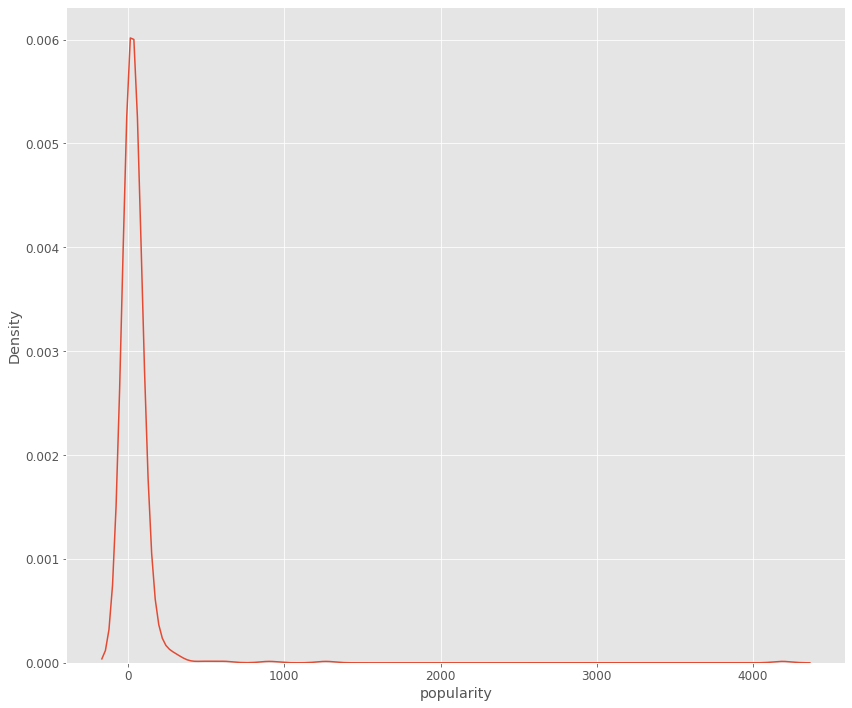

In [15]:
plotkde(data=df, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

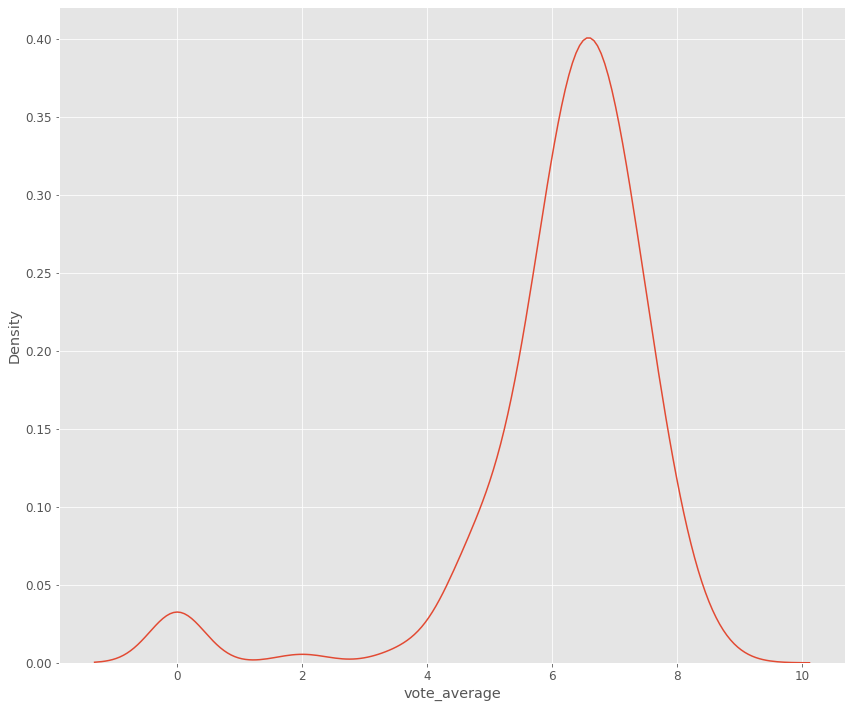

In [16]:
plotkde(data=df, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

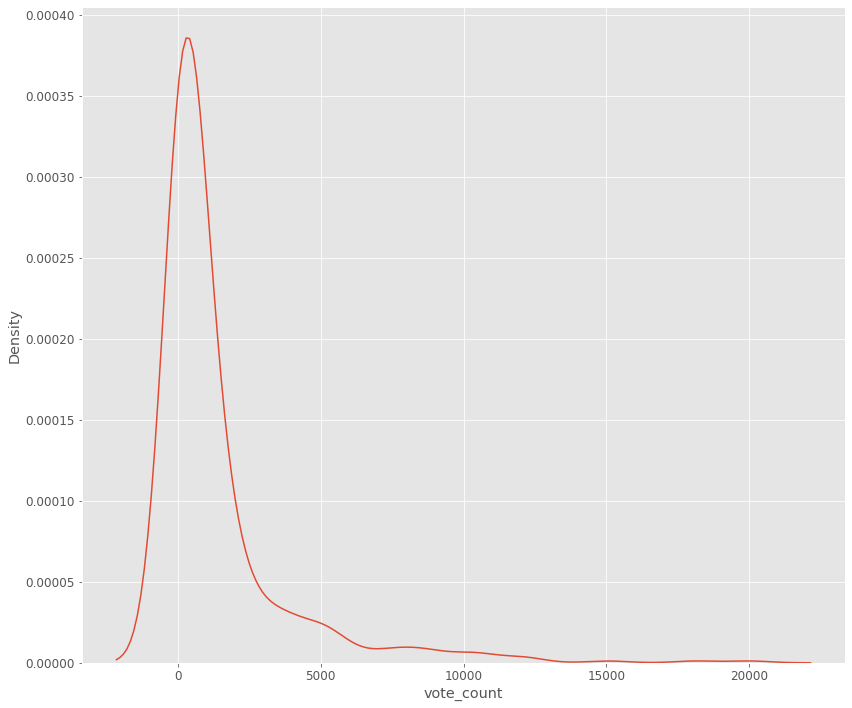

In [17]:
plotkde(data=df, x='vote_count')

# Missing Values Exploration

In [18]:
df.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          2
title                0
vote_average         0
vote_count           0
dtype: int64

<AxesSubplot:>

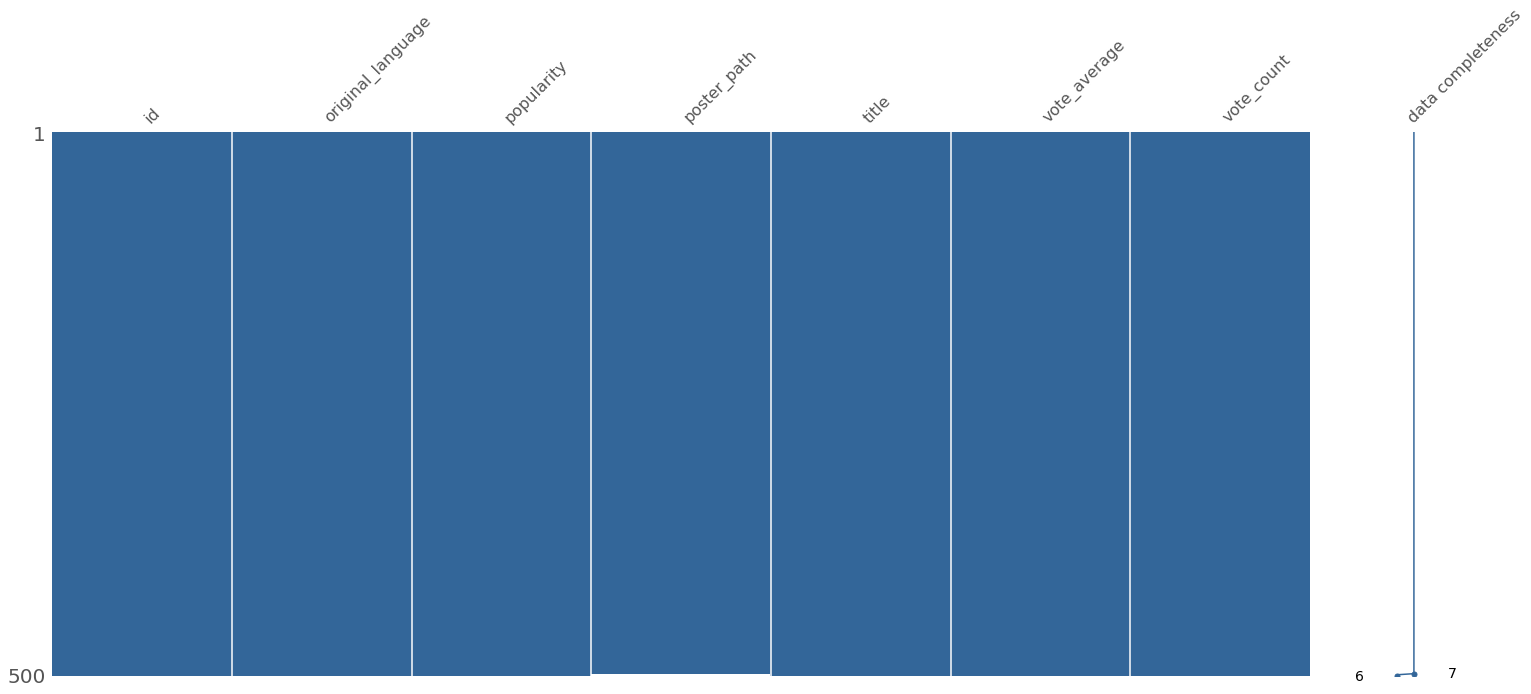

In [19]:
msno.matrix(df, labels=True, sort='descending', color=(0.2, 0.4, 0.6))

In [20]:
df.duplicated().sum()                                   # check for duplicates

0

In [21]:
df.loc[df.duplicated(subset=['id'])]                    # check where id is duplicated

,id,original_language,popularity,poster_path,title,vote_average,vote_count


[Text(0.5, 1.0, 'Count of unique original language')]

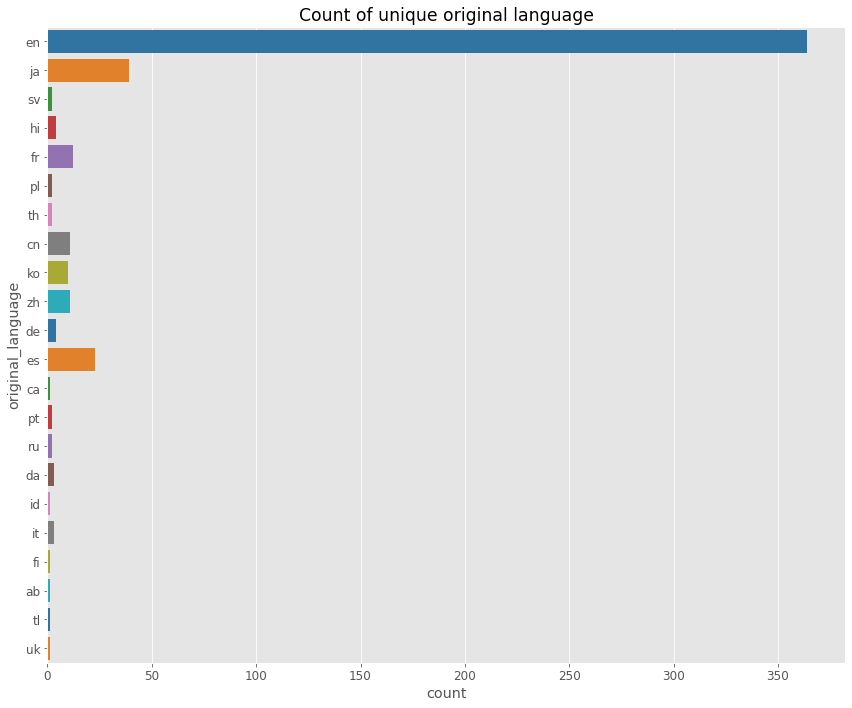

In [22]:
ax = sns.countplot(
  data=df, 
  y='original_language', palette='tab10',
)

ax.set(title='Count of unique original language')

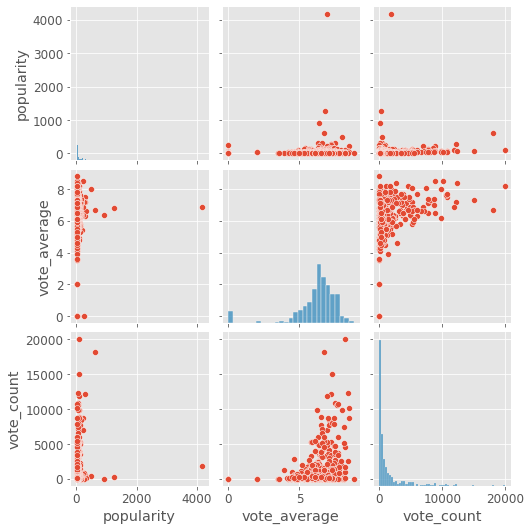

In [23]:
sns.pairplot(df)

In [24]:
df_corr = df[['popularity', 'vote_average', 'vote_count']].corr()
df_corr

,popularity,vote_average,vote_count
popularity,1.000000,0.045442,0.093875
vote_average,0.045442,1.000000,0.256352
vote_count,0.093875,0.256352,1.000000


<AxesSubplot:>

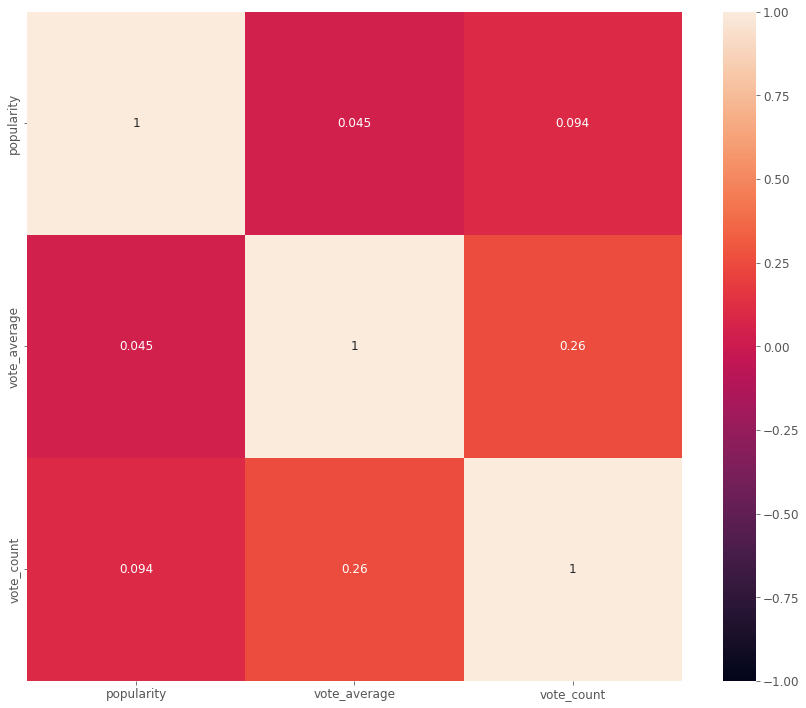

In [25]:
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1)

In [26]:
from matplotlib.ticker import FuncFormatter

# set y-axis formatter
def thousand(x, pos):
  return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
  return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)


# bar plot helper function
def plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        data=data, 
        x=x, y=y, 
        ci=None, hue=hue, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.xaxis.set_major_formatter(formatter=formatter)

    return plot_bar

# Top 20 Movies by Popularity 

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

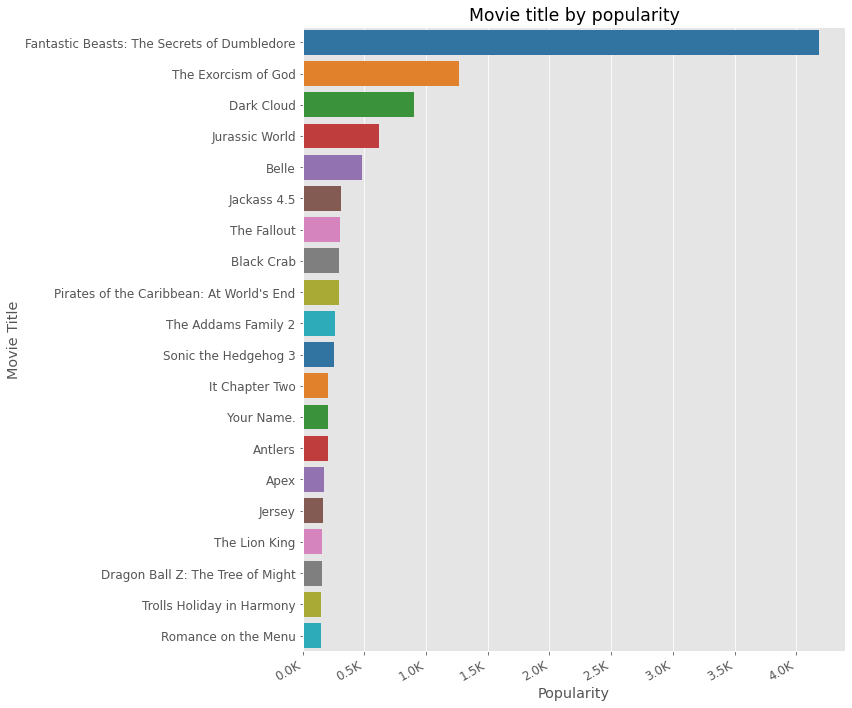

In [27]:
plot_bar(
  data=df.sort_values(by='popularity', ascending=False).head(20),
  x='popularity', y='title', 
  palette='tab10',
  title='Movie title by popularity', xlabel='Popularity', ylabel='Movie Title',
  formatter=format_tsd
)

# Top 20 Movies by Vote Count

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

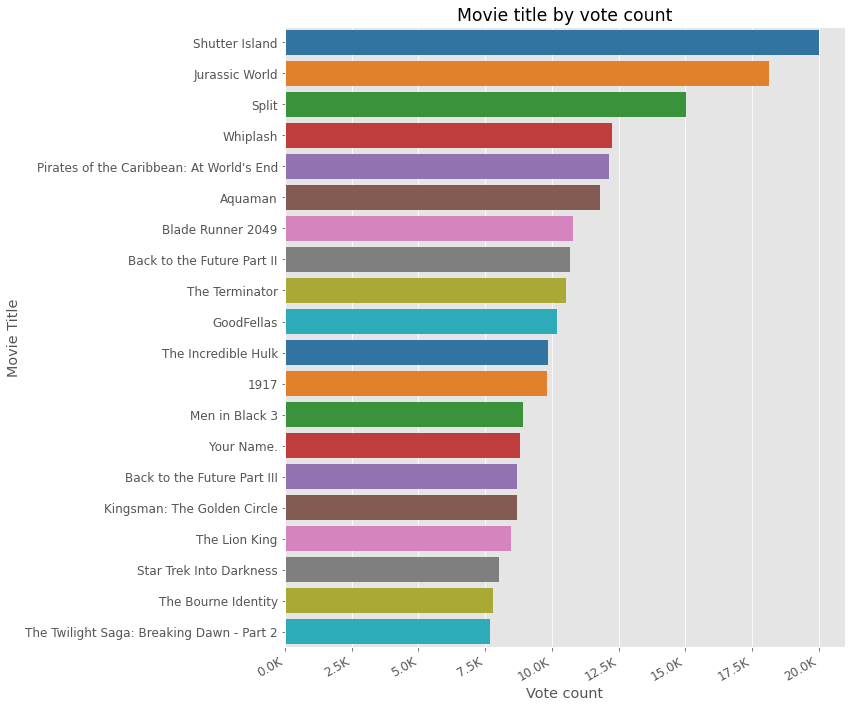

In [28]:
plot_bar(
  data=df.sort_values(by='vote_count', ascending=False).head(20),
  x='vote_count', y='title', 
  palette='tab10',
  title='Movie title by vote count', xlabel='Vote count', ylabel='Movie Title',
  formatter=format_tsd
)

# Top 20 Movies by Vote Average

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

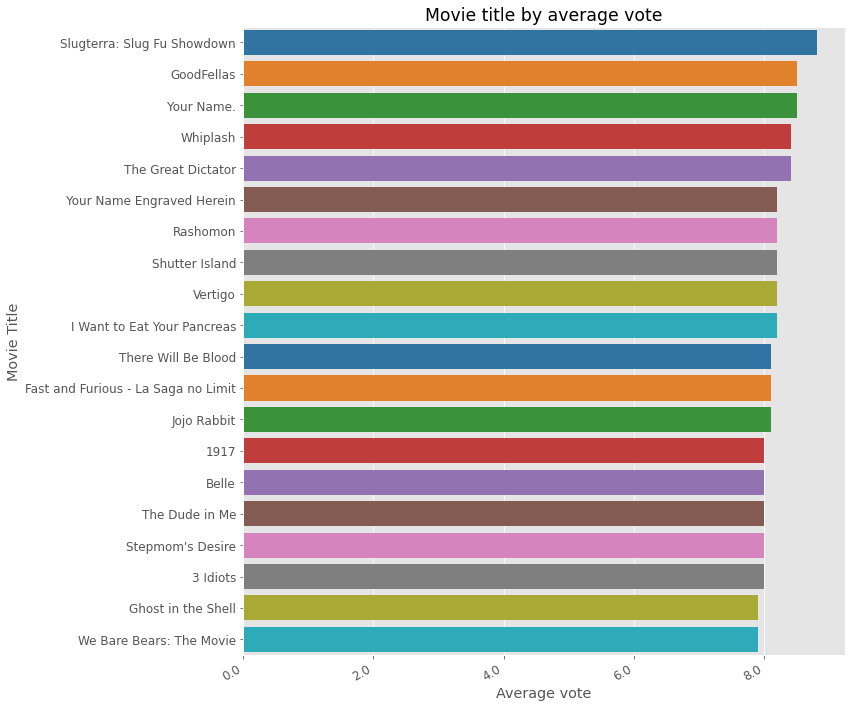

In [29]:
plot_bar(
  data=df.sort_values(by='vote_average', ascending=False).head(20),
  x='vote_average', y='title', 
  palette='tab10',
  title='Movie title by average vote', xlabel='Average vote', ylabel='Movie Title',
  formatter=format_orig
)

# Movies With Release Date

In [30]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
release_date = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies[:280]:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  rel_date = release_date.append(pg['results'][0]['release_date']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [31]:
data1 = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'release_date': release_date,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df1 = pd.DataFrame(data=data1)
df1.head()

,page_number,adult,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,1,False,338953,en,4188.230,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1841
1,2,False,836225,en,1265.345,/hangTmbxpSV4gpHG7MgSlCWSSFa.jpg,2022-02-10,The Exorcism of God,6.8,244
2,3,False,897424,en,903.489,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,2022-05-09,Dark Cloud,6.4,23
3,4,False,135397,en,615.480,/A0LZHXUzo5C60Oahvt7VxvwuzHw.jpg,2015-06-06,Jurassic World,6.7,18124
4,5,False,776305,ja,482.288,/e143CxHsD7oVxqrxk29I5SJrjrl.jpg,2021-07-16,Belle,8.0,340


In [32]:
# drop page number and adult columns
df1.drop(columns=['page_number', 'adult'], inplace=True)
df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,338953,en,4188.230,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1841
1,836225,en,1265.345,/hangTmbxpSV4gpHG7MgSlCWSSFa.jpg,2022-02-10,The Exorcism of God,6.8,244
2,897424,en,903.489,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,2022-05-09,Dark Cloud,6.4,23
3,135397,en,615.480,/A0LZHXUzo5C60Oahvt7VxvwuzHw.jpg,2015-06-06,Jurassic World,6.7,18124
4,776305,ja,482.288,/e143CxHsD7oVxqrxk29I5SJrjrl.jpg,2021-07-16,Belle,8.0,340


In [33]:
df1.shape

(280, 8)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 280 non-null    int64  
 1   original_language  280 non-null    object 
 2   popularity         280 non-null    float64
 3   poster_path        280 non-null    object 
 4   release_date       280 non-null    object 
 5   title              280 non-null    object 
 6   vote_average       280 non-null    float64
 7   vote_count         280 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 17.6+ KB


In [35]:
pd.value_counts(df1.dtypes)

object     4
int64      2
float64    2
dtype: int64

In [36]:
df1['id'] = df1['id'].astype('category')                        # convert id to categorical            
df1['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 280 entries, 0 to 279
Series name: id
Non-Null Count  Dtype   
--------------  -----   
280 non-null    category
dtypes: category(1)
memory usage: 11.0 KB


In [37]:
df1['release_date'] = pd.to_datetime(df1['release_date'])       # convert release date to datetime
df1.dtypes

id                         category
original_language            object
popularity                  float64
poster_path                  object
release_date         datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
dtype: object

In [38]:
df1['year'] = df1['release_date'].dt.year                       # extract year
df1['month'] = df1['release_date'].dt.month                     # extract month
df1['day'] = df1['release_date'].dt.day                         # extract day
df1['day_name'] = df1['release_date'].dt.day_name()             # extract day name
df1['week'] = df1['release_date'].dt.week                       # extract week
df1['quarter']= df1['release_date'].dt.quarter                  # extract quarter

df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,338953,en,4188.230,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1841,2022.0,4.0,6.0,Wednesday,14.0,2.0
1,836225,en,1265.345,/hangTmbxpSV4gpHG7MgSlCWSSFa.jpg,2022-02-10,The Exorcism of God,6.8,244,2022.0,2.0,10.0,Thursday,6.0,1.0
2,897424,en,903.489,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,2022-05-09,Dark Cloud,6.4,23,2022.0,5.0,9.0,Monday,19.0,2.0
3,135397,en,615.480,/A0LZHXUzo5C60Oahvt7VxvwuzHw.jpg,2015-06-06,Jurassic World,6.7,18124,2015.0,6.0,6.0,Saturday,23.0,2.0
4,776305,ja,482.288,/e143CxHsD7oVxqrxk29I5SJrjrl.jpg,2021-07-16,Belle,8.0,340,2021.0,7.0,16.0,Friday,28.0,3.0


In [39]:
df1.describe(exclude='number')

,id,original_language,poster_path,release_date,title,day_name
count,280.0,280,280,277,280,277
unique,280.0,17,280,265,280,7
top,165.0,en,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-06-18 00:00:00,Fantastic Beasts: The Secrets of Dumbledore,Friday
freq,1.0,201,1,3,1,95
first,NaN,NaN,NaN,1958-05-28 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2023-06-07 00:00:00,NaN,NaN


In [40]:
df1.drop(columns=['year', 'month', 'day', 'week', 'quarter']).describe(include='number')

,popularity,vote_average,vote_count
count,280.000000,280.000000,280.000000
mean,75.479721,6.260714,2028.589286
std,270.089132,1.614149,3113.846711
min,10.877000,0.000000,0.000000
25%,22.222500,5.975000,131.500000
50%,32.149500,6.600000,624.000000
75%,56.222750,7.100000,2596.500000
max,4188.230000,8.500000,19992.000000


<AxesSubplot:xlabel='popularity', ylabel='Density'>

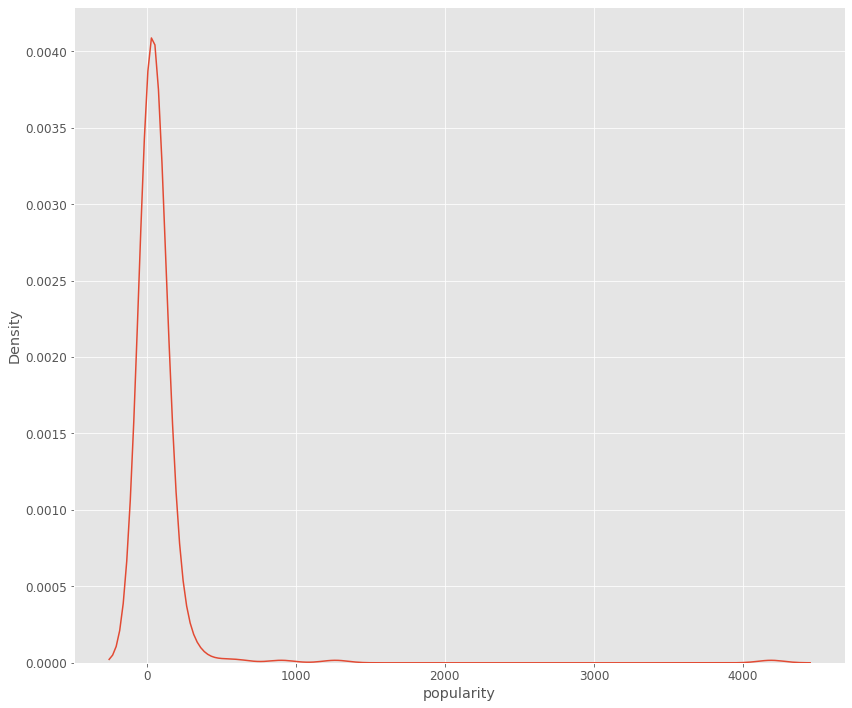

In [41]:
plotkde(data=df1, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

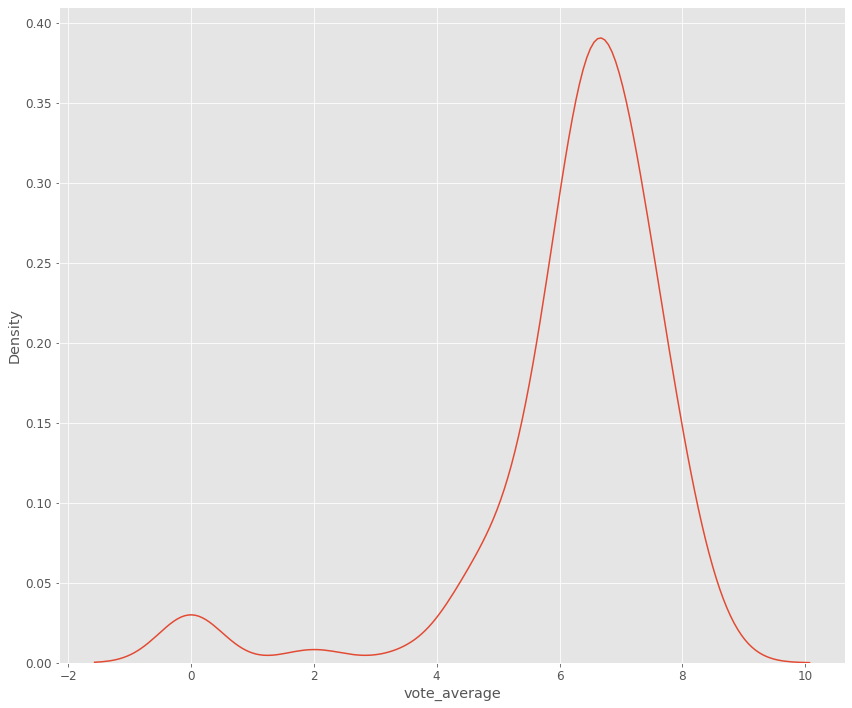

In [42]:
plotkde(data=df1, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

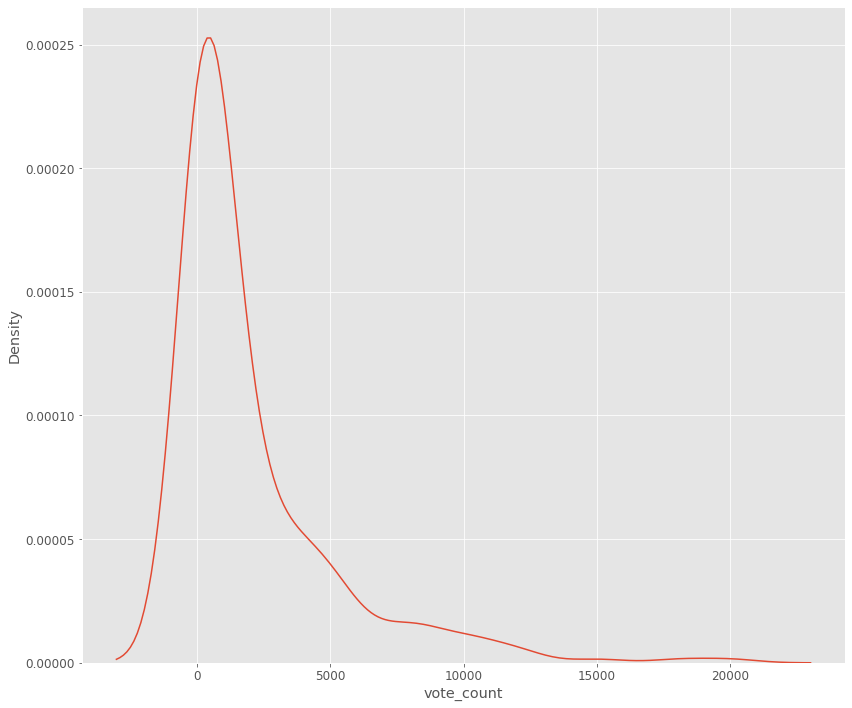

In [43]:
plotkde(data=df1, x='vote_count')

# Missing Values Exploration

In [44]:
df1.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          0
release_date         3
title                0
vote_average         0
vote_count           0
year                 3
month                3
day                  3
day_name             3
week                 3
quarter              3
dtype: int64

<AxesSubplot:>

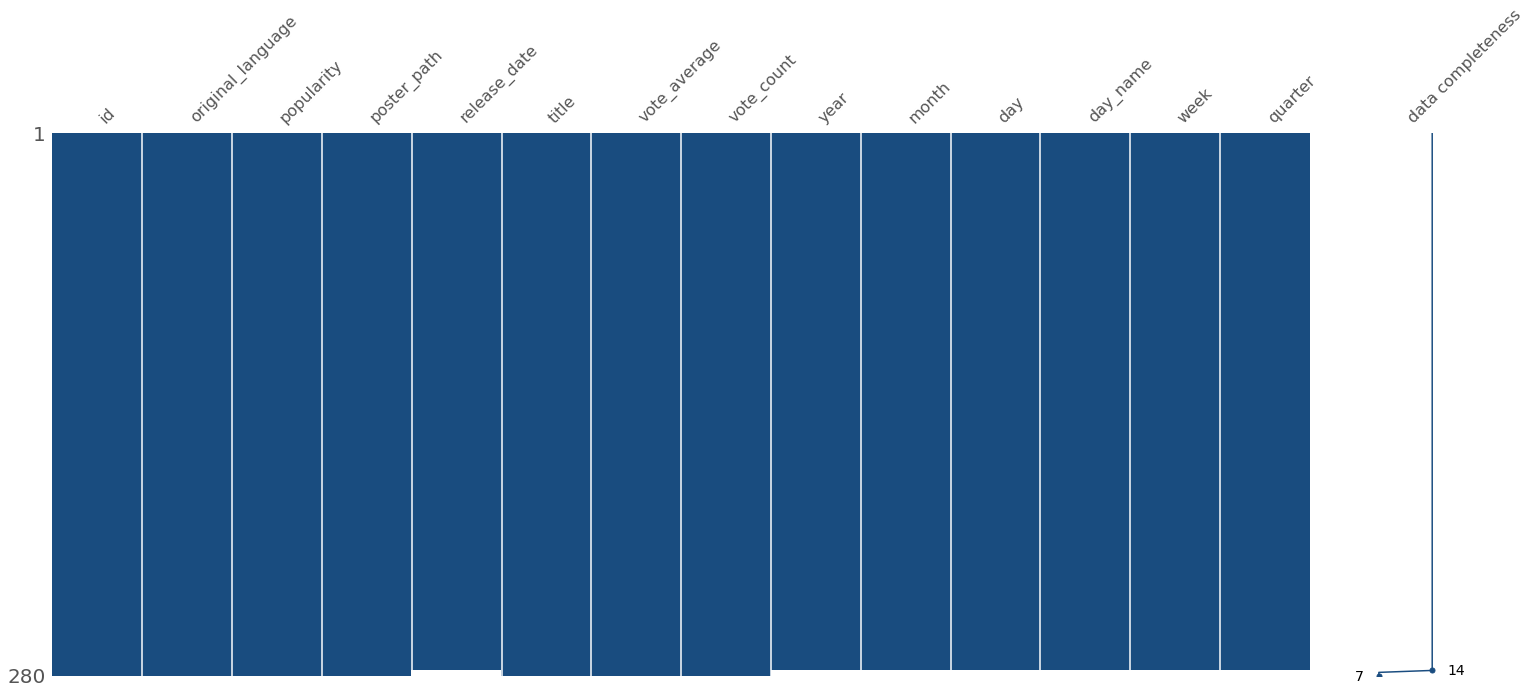

In [45]:
msno.matrix(df1, labels=True, sort='descending', color=(0.1, 0.3, 0.5))

In [46]:
df1.duplicated().sum()                                # check for duplicates

0

In [47]:
df1.loc[df.duplicated(subset=['id'])]                 # check where id is duplicated

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter


In [48]:
df1.query("release_date == 'NaT'")                    # filter release_date with missing values

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
10,939243,en,249.822,/aNSBaYTgPz8QEADi3xiD52X4uVF.jpg,NaT,Sonic the Hedgehog 3,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
65,912649,en,66.196,/p2iubH4NpXpIDAWCuITTuJhmde5.jpg,NaT,Venom 3,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
132,570678,en,42.864,/f0yyNYYdFJ2p9yuzUiJWEDdYRXW.jpg,NaT,Constantine 2,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df1_notna = df1[~df1['release_date'].isna()]          # create a dataframe without missing values in release date
df1_notna.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,338953,en,4188.230,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1841,2022.0,4.0,6.0,Wednesday,14.0,2.0
1,836225,en,1265.345,/hangTmbxpSV4gpHG7MgSlCWSSFa.jpg,2022-02-10,The Exorcism of God,6.8,244,2022.0,2.0,10.0,Thursday,6.0,1.0
2,897424,en,903.489,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,2022-05-09,Dark Cloud,6.4,23,2022.0,5.0,9.0,Monday,19.0,2.0
3,135397,en,615.480,/A0LZHXUzo5C60Oahvt7VxvwuzHw.jpg,2015-06-06,Jurassic World,6.7,18124,2015.0,6.0,6.0,Saturday,23.0,2.0
4,776305,ja,482.288,/e143CxHsD7oVxqrxk29I5SJrjrl.jpg,2021-07-16,Belle,8.0,340,2021.0,7.0,16.0,Friday,28.0,3.0


In [50]:
df1_notna.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          0
release_date         0
title                0
vote_average         0
vote_count           0
year                 0
month                0
day                  0
day_name             0
week                 0
quarter              0
dtype: int64

In [51]:
df1_notna['year'] = np.int64(df1_notna['year'])        # change year to integer data type
df1_notna.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,338953,en,4188.230,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1841,2022,4.0,6.0,Wednesday,14.0,2.0
1,836225,en,1265.345,/hangTmbxpSV4gpHG7MgSlCWSSFa.jpg,2022-02-10,The Exorcism of God,6.8,244,2022,2.0,10.0,Thursday,6.0,1.0
2,897424,en,903.489,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,2022-05-09,Dark Cloud,6.4,23,2022,5.0,9.0,Monday,19.0,2.0
3,135397,en,615.480,/A0LZHXUzo5C60Oahvt7VxvwuzHw.jpg,2015-06-06,Jurassic World,6.7,18124,2015,6.0,6.0,Saturday,23.0,2.0
4,776305,ja,482.288,/e143CxHsD7oVxqrxk29I5SJrjrl.jpg,2021-07-16,Belle,8.0,340,2021,7.0,16.0,Friday,28.0,3.0


[Text(0.5, 1.0, 'Count of unique original language')]

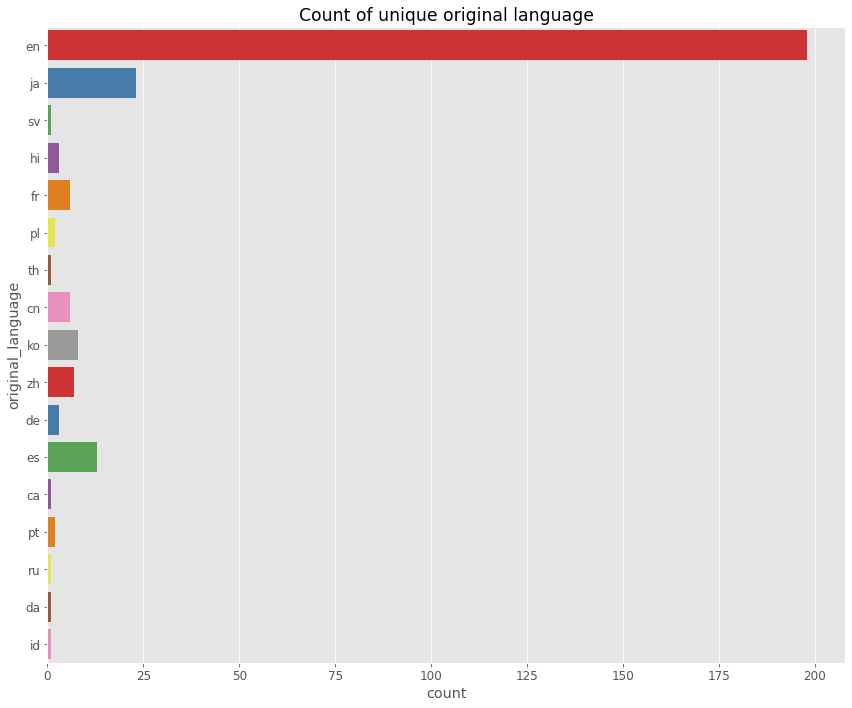

In [52]:
ax1 = sns.countplot(
  data=df1_notna,
  y='original_language', palette='Set1',
)

ax1.set(title='Count of unique original language')

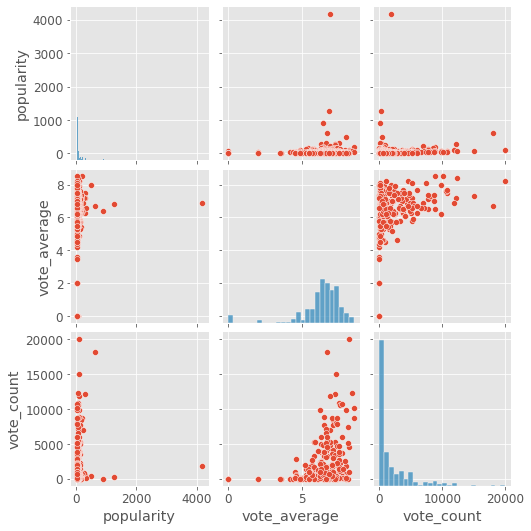

In [53]:
sns.pairplot(df1_notna[['popularity', 'vote_average', 'vote_count']])

In [54]:
df_corr1 = df1_notna[['popularity', 'vote_average', 'vote_count']].corr()
df_corr1

,popularity,vote_average,vote_count
popularity,1.000000,0.061433,0.053169
vote_average,0.061433,1.000000,0.298079
vote_count,0.053169,0.298079,1.000000


<AxesSubplot:>

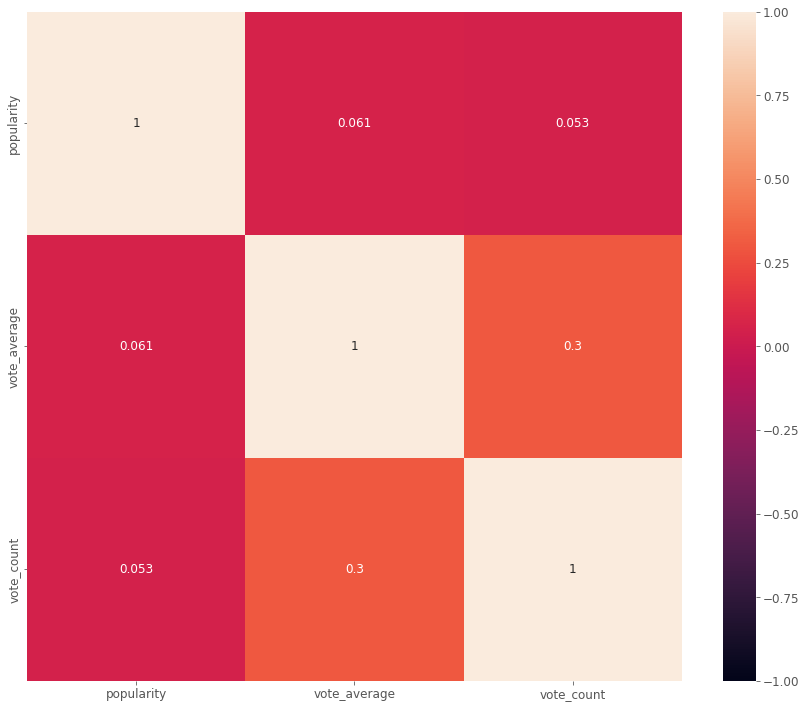

In [55]:
sns.heatmap(df_corr1, annot=True, vmin=-1, vmax=1)

<AxesSubplot:xlabel='year', ylabel='popularity'>

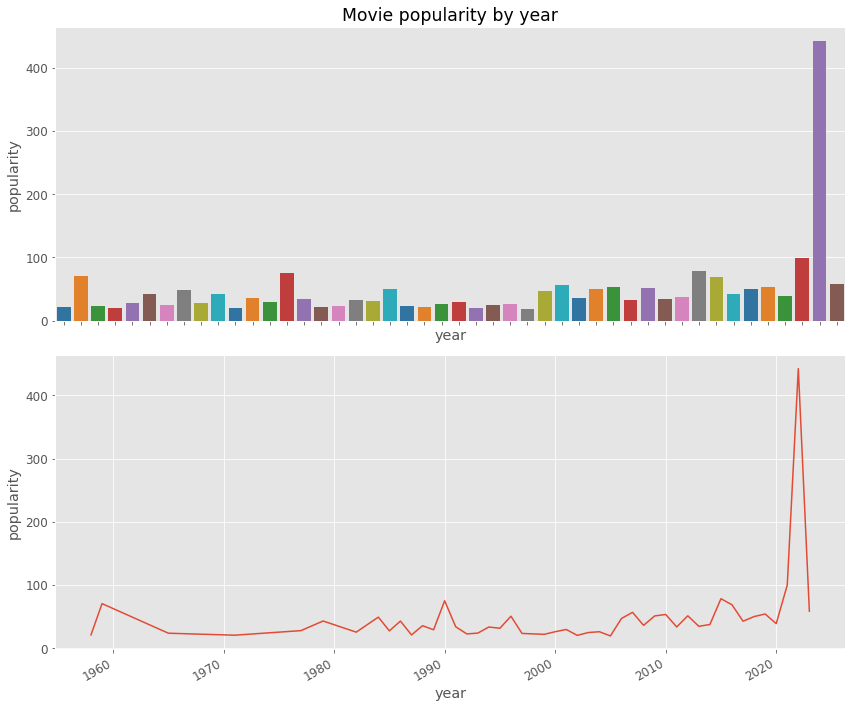

In [56]:
# create figure and axis
fig, (axs1, axs2) = plt.subplots(2, 1)
fig.autofmt_xdate()

sns.barplot(
  data=df1,
  x='year', y='popularity', ci=None,
  palette='tab10', 
  ax=axs1
)

# label plot title
axs1.set(title='Movie popularity by year')

sns.lineplot(
  data=df1,
  x='year', y='popularity', ci=None,
  palette='tab10',
  ax=axs2
)